In [83]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots

import os

# Read in the data
df = pd.read_csv(r'C:\Users\u164590\Downloads\python_portfolio_project\movies.csv')


In [97]:
#Let's look at the data
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

In [85]:
#See if any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [86]:
#data types for the columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [87]:
df = df.dropna()
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [88]:
#create correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [89]:
df = df.sort_values(by=['gross'],inplace = False, ascending = False)


In [90]:
pd.set_option('display.max_rows',None)

In [91]:
# Drop any duplicates
df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

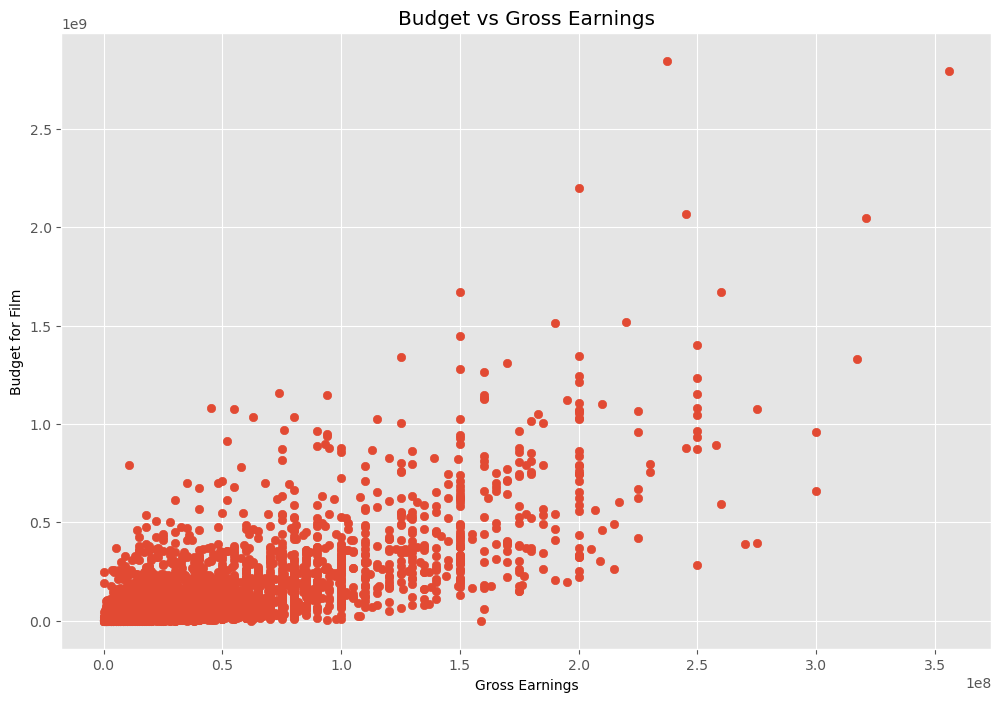

In [92]:
#Scatter plot with budget vs gross 

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

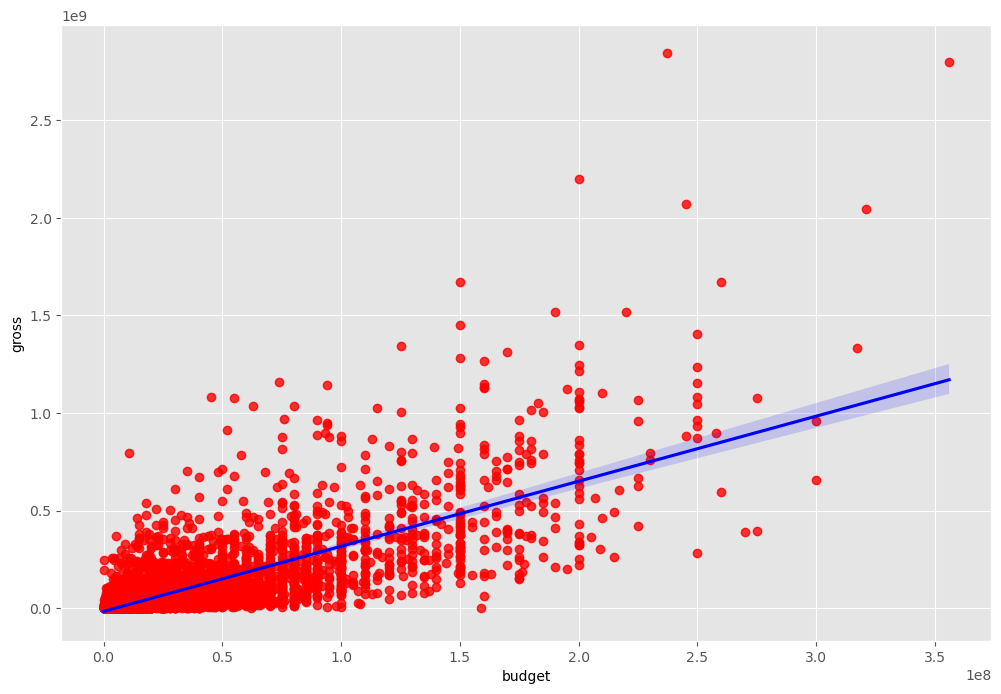

In [93]:
# Plot budget vs gross using seaborn

sns.regplot(x= 'budget', y = 'gross', data = df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [94]:
#Correlation

df.corr()

C:\Users\u164590\AppData\Local\Temp\ipykernel_11512\524132939.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

C:\Users\u164590\AppData\Local\Temp\ipykernel_11512\1743041596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

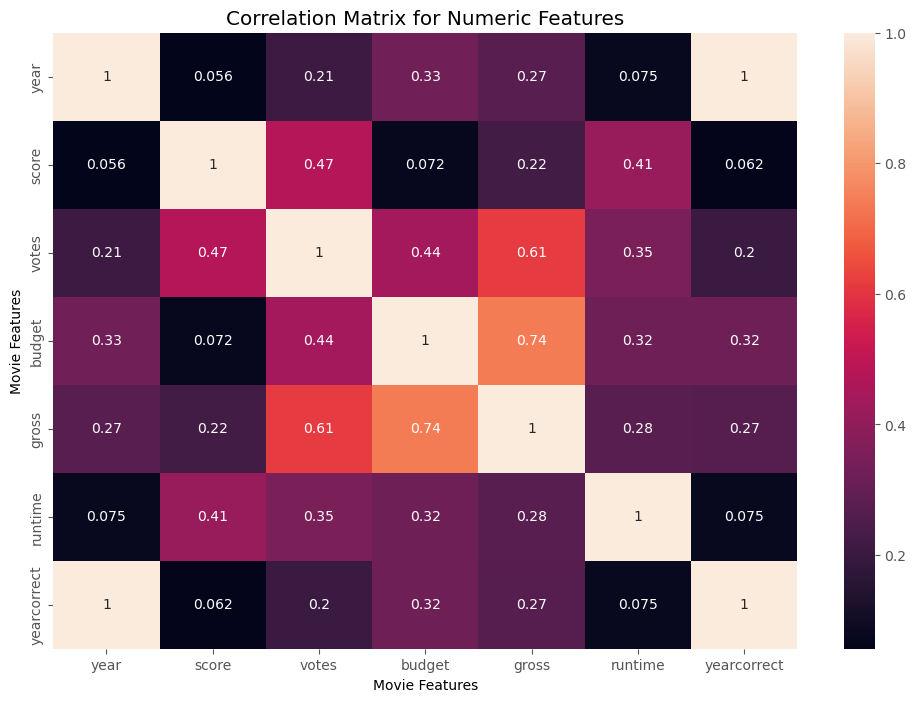

In [95]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [96]:
#Factorize 

df_factorized = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
for col_name in df_factorized.columns:
    if (df_factorized[col_name].dtype == 'object'):
        df_factorized[col_name] = df_factorized[col_name].astype('category')
        df_factorized[col_name] = df_factorized[col_name].cat.codes

df_factorized


name    rating     genre      year  released     score  \
name         1.000000  0.314800  0.186668  0.267282  0.667785  0.136453   
rating       0.314800  1.000000  0.031419  0.096638  0.241253 -0.075109   
genre        0.186668  0.031419  1.000000  0.075279  0.115079  0.047421   
year         0.267282  0.096638  0.075279  1.000000  0.359792  0.045163   
released     0.667785  0.241253  0.115079  0.359792  1.000000  0.099608   
score        0.136453 -0.075109  0.047421  0.045163  0.099608  1.000000   
votes        0.608411  0.121122  0.177836  0.286895  0.481682  0.247863   
director     0.679808  0.230190  0.131437  0.186504  0.478950  0.176116   
writer       0.764057  0.251470  0.129595  0.231664  0.541155  0.122357   
star         0.599410  0.226007  0.143735  0.240670  0.439566  0.139126   
country      0.124405  0.111309 -0.055109 -0.047325  0.095519 -0.057087   
budget       0.526690  0.283770  0.175071  0.190333  0.396934 -0.005767   
gross        0.986431  0.319778  0.185075  0.277721  0.677897  0.139819   
company      0.631721  0.269792  0.080643  0.136096  0.410407  0.022732   
runtime      0.089567  0.029208  0.011329  0.037011  0.058183  0.057866   
yearcorrect  0.262849  0.087261  0.071750  0.949995  0.358544  0.053108   

                votes  director    writer      star   country    budget  \
name         0.608411  0.679808  0.764057  0.599410  0.124405  0.526690   
rating       0.121122  0.230190  0.251470  0.226007  0.111309  0.283770   
genre        0.177836  0.131437  0.129595  0.143735 -0.055109  0.175071   
year         0.286895  0.186504  0.231664  0.240670 -0.047325  0.190333   
released     0.481682  0.478950  0.541155  0.439566  0.095519  0.396934   
score        0.247863  0.176116  0.122357  0.139126 -0.057087 -0.005767   
votes        1.000000  0.472671  0.522918  0.429085  0.013363  0.317842   
director     0.472671  1.000000  0.642875  0.504992  0.123672  0.443150   
writer       0.522918  0.642875  1.000000  0.510628  0.138299  0.449523   
star         0.429085  0.504992  0.510628  1.000000  0.106459  0.457442   
country      0.013363  0.123672  0.138299  0.106459  1.000000  0.112280   
budget       0.317842  0.443150  0.449523  0.457442  0.112280  1.000000   
gross        0.620450  0.692902  0.776528  0.612142  0.123874  0.532810   
company      0.346864  0.528071  0.532013  0.455443  0.177990  0.476917   
runtime      0.088525  0.084943  0.066645  0.096652  0.020546  0.092727   
yearcorrect  0.287857  0.190556  0.230543  0.242124 -0.045134  0.183598   

                gross   company   runtime  yearcorrect  
name         0.986431  0.631721  0.089567     0.262849  
rating       0.319778  0.269792  0.029208     0.087261  
genre        0.185075  0.080643  0.011329     0.071750  
year         0.277721  0.136096  0.037011     0.949995  
released     0.677897  0.410407  0.058183     0.358544  
score        0.139819  0.022732  0.057866     0.053108  
votes        0.620450  0.346864  0.088525     0.287857  
director     0.692902  0.528071  0.084943     0.190556  
writer       0.776528  0.532013  0.066645     0.230543  
star         0.612142  0.455443  0.096652     0.242124  
country      0.123874  0.177990  0.020546    -0.045134  
budget       0.532810  0.476917  0.092727     0.183598  
gross        1.000000  0.637241  0.088572     0.272536  
company      0.637241  1.000000  0.069329     0.134709  
runtime      0.088572  0.069329  1.000000     0.036785  
yearcorrect  0.272536  0.134709  0.036785     1.000000

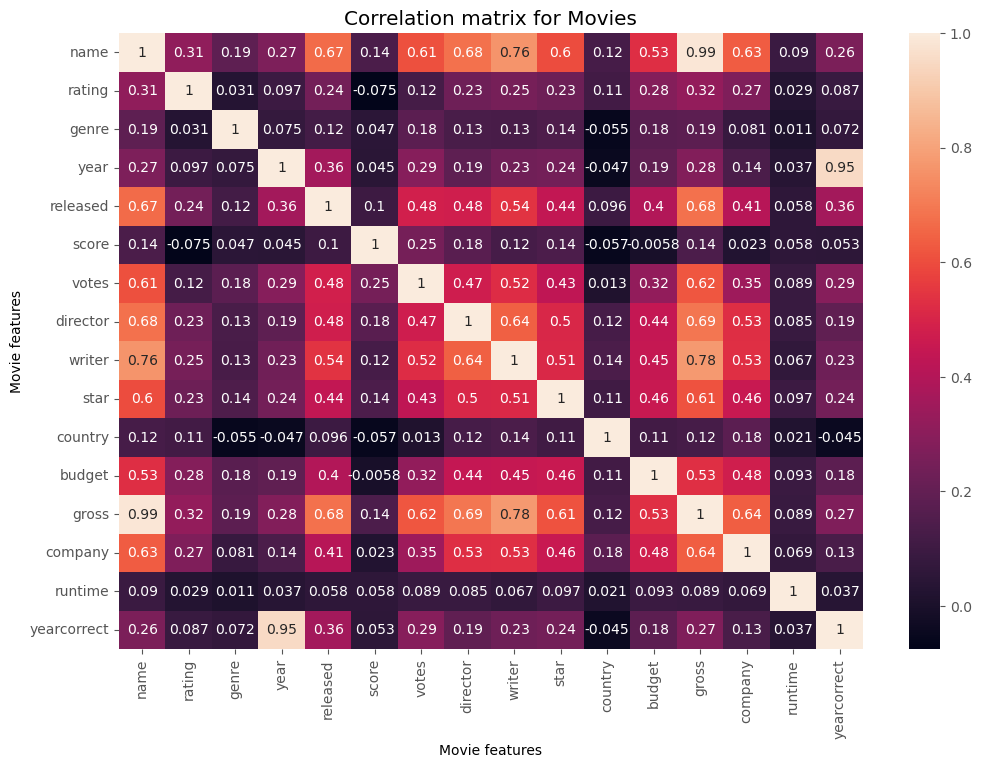

In [98]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [99]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.314800
             genre          0.186668
             year           0.267282
             released       0.667785
             score          0.136453
             votes          0.608411
             director       0.679808
             writer         0.764057
             star           0.599410
             country        0.124405
             budget         0.526690
             gross          0.986431
             company        0.631721
             runtime        0.089567
             yearcorrect    0.262849
rating       name           0.314800
             rating         1.000000
             genre          0.031419
             year           0.096638
             released       0.241253
             score         -0.075109
             votes          0.121122
             director       0.230190
             writer         0.251470
             star           0.226007
             country        0.111309
 

In [100]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

sorted_pairs

score        rating        -0.075109
rating       score         -0.075109
score        country       -0.057087
country      score         -0.057087
genre        country       -0.055109
country      genre         -0.055109
year         country       -0.047325
country      year          -0.047325
yearcorrect  country       -0.045134
country      yearcorrect   -0.045134
budget       score         -0.005767
score        budget        -0.005767
genre        runtime        0.011329
runtime      genre          0.011329
country      votes          0.013363
votes        country        0.013363
country      runtime        0.020546
runtime      country        0.020546
company      score          0.022732
score        company        0.022732
rating       runtime        0.029208
runtime      rating         0.029208
genre        rating         0.031419
rating       genre          0.031419
yearcorrect  runtime        0.036785
runtime      yearcorrect    0.036785
year         runtime        0.037011
r

In [101]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         director       0.504992
director     star           0.504992
writer       star           0.510628
star         writer         0.510628
writer       votes          0.522918
votes        writer         0.522918
name         budget         0.526690
budget       name           0.526690
director     company        0.528071
company      director       0.528071
writer       company        0.532013
company      writer         0.532013
budget       gross          0.532810
gross        budget         0.532810
released     writer         0.541155
writer       released       0.541155
name         star           0.599410
star         name           0.599410
votes        name           0.608411
name         votes          0.608411
gross        star           0.612142
star         gross          0.612142
gross        votes          0.620450
votes        gross          0.620450
company      name           0.631721
name         company        0.631721
company      gross          0.637241
g

In [102]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64